<a href="https://colab.research.google.com/github/dhikaainul/Machine_Learning_Quiz_2/blob/main/ML_Quiz2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAMA : DHIKA AINUL LUTHFI**

**NIM : 2241727007**

**KELAS : TI-4J**

### Ketentuan:

1.   Pengerjaan secara individu alias setiap mahasiswa!
2.   terdapat data dengan nilai #N/A, pertimbangkan cara terbaik untuk mengatasi nilai tersebut.
3.   Tidak boleh ada duplikasi pekerjaan antar mahasiswa (evaluasi pemahaman pengerjaan quiz 2 dilaksanakan pada Minggu ke-14)


### Soal:




####Persiapan

In [11]:
# import package
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier # import DT
from sklearn.ensemble import RandomForestClassifier # import RandomForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [12]:
# baca data
df = pd.read_csv('dataset_quiz.csv')
df.head()

,luaran_hki,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
0,TIDAK ADA,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
1,TIDAK ADA,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
2,TIDAK ADA,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
3,TIDAK ADA,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
4,TIDAK ADA,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA


In [13]:
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()

for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

df.head()

,luaran_hki,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
0,1,0,0,0,1,1,1,0,3,1
1,1,0,0,0,1,1,1,0,3,1
2,1,0,0,0,1,1,1,0,3,1
3,1,0,0,0,1,1,1,0,3,1
4,1,0,0,0,1,1,1,0,3,1


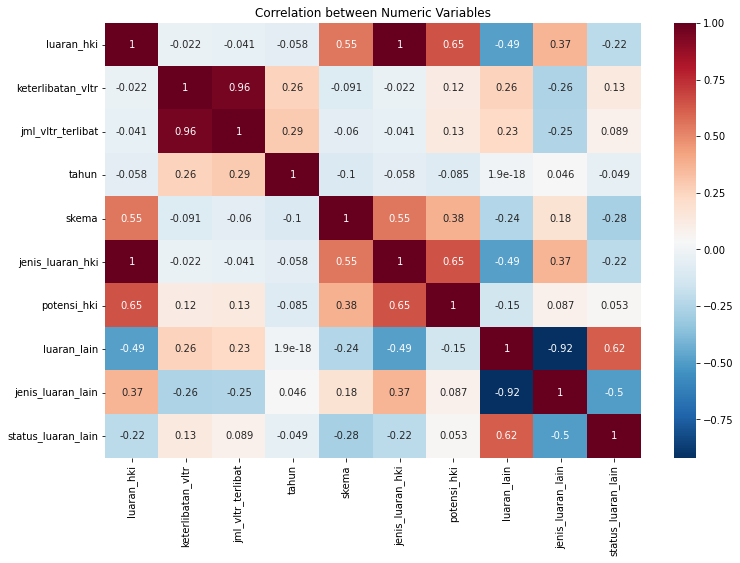

In [14]:
corr_pearson = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_pearson, cmap="RdBu_r",annot=True)

plt.title('Correlation between Numeric Variables')
plt.show()

1.   Buat 5 jenis visualisasi yang dapat dihasilkan dari data yang diberikan! (**5 poin**)

2.   Lakukan pemilahan data training dan testing yang sesuai dan proporsional dari data tersebut! (**5 poin**)
3.   Tentukan data validasi! (**5 poin**)

In [15]:
# Split data
from sklearn.model_selection import train_test_split

# Split data training dan dan lainnya
# data lainnya, akan kita split lagi menjadi validasi dan testing.
# Rasio yang akan kita gunakan adalah 8:1:1
df_train, df_unseen = train_test_split(df, test_size=0.2, random_state=0)

# Split lagi antara validasi dan testing
df_val, df_test = train_test_split(df_unseen, test_size=0.5, random_state=0)

# Cek masing-masing ukuran data

print(f'Jumlah data asli: {df.shape[0]}')
print(f'Jumlah data train: {df_train.shape[0]}')
print(f'Jumlah data val: {df_val.shape[0]}')
print(f'Jumlah data test: {df_test.shape[0]}')

Jumlah data asli: 68
Jumlah data train: 54
Jumlah data val: 7
Jumlah data test: 7


4.   Terapkan dua jenis metode klasifikasi dan lakukan perbandingan akurasi  dengan wajib melibatkan variabel keterlibatan volunteer sampai variabel luaran-luaran yang dihasilkan! (**20 poin**)

In [16]:
# Seleksi fitur

X = df.iloc[:,2:]
y = df['luaran_hki']

# Cek jumlah fitur dan instance
X.shape

(68, 8)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Traning Decision Tree

In [18]:
# Secara default, DecisionTreeClassifier dari scikit-learn akan menggunakan nilai "Gini" untuk kriteria
# Terdapat beberapa "hyperparamater" yang dapat digunakan. Silahka baca dokumentasi
# Pada kasus ini kita akan menggunakan parameter default
dt = DecisionTreeClassifier()

# Sesuaikan dt ke set training
dt.fit(X_train, y_train)

# Memprediksi label set test
y_pred_dt = dt.predict(X_test)

#  menghitung set accuracy
acc_dt = accuracy_score(y_test, y_pred_dt)
print("Test set accuracy: {:.2f}".format(acc_dt))
print(f"Test set accuracy: {acc_dt}")

Test set accuracy: 1.00
Test set accuracy: 1.0


### Training RandomForest

In [19]:
# Pada kasus kali ini kita akan menggunakan seluruh parameter default dari RandomForest
# Untuk detail parameter (hyperparameter) silahkan cek dokumentasi

rf = RandomForestClassifier(n_estimators=10, random_state=1)

# Sesuaikan dt ke set training
rf.fit(X_train, y_train)

# Memprediksi label set test
y_pred_rf = rf.predict(X_test)

#  menghitung set accuracy
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Test set accuracy: {:.2f}".format(acc_rf))
print(f"Test set accuracy: {acc_rf}")

Test set accuracy: 1.00
Test set accuracy: 1.0


5. Terapkan sebuah metode prediksi (berdasarkan tahun, misal: jumlah kegiatan pada tahun tertentu sebagai x dan jumlah  luaran sebagai y) serta hitung akurasinya dengan wajib melibatkan variabel keterlibatan volunteer sampai variabel luaran-luaran yang dihasilkan! (**20 poin**)

### Regresi Linier

In [21]:
# Buat variabel bebas X dan Y, sebagai contoh ambil dari hasil analisis korelasi dari kegaitan sebelumnya
X = df['jml_vltr_terlibat']
y = df['keterlibatan_vltr']

In [26]:
# Buat pemisahan data uji dan data latih dengan proporsi 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [27]:
# hasil training dtaset
X_train
y_train

32    1
21    1
47    1
39    1
54    1
25    0
45    0
55    1
38    1
56    1
23    1
57    0
41    1
7     0
3     0
44    0
50    0
51    0
19    0
13    0
1     0
31    0
4     0
27    1
59    0
22    1
29    0
9     0
16    0
43    1
36    0
15    1
66    1
65    1
49    0
58    0
14    0
61    1
2     0
53    0
34    1
52    0
30    1
10    0
48    1
24    1
8     0
Name: keterlibatan_vltr, dtype: int64

In [28]:
# training model
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [29]:
# fitting garis regresi
lr = sm.OLS(y_train, X_train_sm).fit()
lr.params

const                0.047936
jml_vltr_terlibat    0.328895
dtype: float64

In [30]:
# analisis statistika dari garis regresi
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      keterlibatan_vltr   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     374.4
Date:                Thu, 24 Nov 2022   Prob (F-statistic):           1.92e-23
Time:                        11:00:22   Log-Likelihood:                 18.613
No. Observations:                  47   AIC:                            -33.23
Df Residuals:                      45   BIC:                            -29.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0479      0.032      1.505      0.139      -0.016       0.112
jml_vltr_terlibat     0.3289      0.017     19.350      0.000       0.295       0.363
==============================================================================
Omnibus:                       44.152   Durbin-Watson:                   2.149
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.757
Skew:                           2.508   Prob(JB):                     2.48e-34
Kurtosis:                      10.340   Cond. No.                         2.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

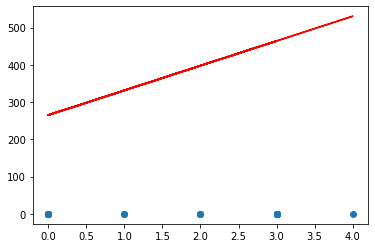

In [31]:
# visualisasi garis regresi
plt.scatter(X_train, y_train)
plt.plot(X_train, 265.2483 + 66.3015*X_train, 'r')
plt.show()

####Yang Belum
6. Buat Confusion Matrix dan ROC berdasarkan klasifikasi yang diterapkan pada nomor 4! (15 poin)
7. Lakukan hyperparameter tunning berdasarkan jawaban nomor 2, 3, dan 4 menggunakan metode Grid Search, Random Search, dan Exhausive Search! (20 poin)
8. Tambahkan visualisasi berdasarkan nomor 4 dan 5 (masing-masing nomor minimal satu visualisasi)! (10 poin)